# Forecasting Principle and Practices

## 1. Time series regression models

### 1.1 Linear Model

In the simplest case, the regression model allows for a linear relationship between the forecast variable $y$ and a single predictor variable $x$:


$y_{t} = \beta_{0} + \beta_{1} x_{t} + \epsilon$

$ \beta_{0}$ - Coefficient denotes intercept, it represents the predicted value of $y$ when $x=0$

$\beta_{1}$ - Coefficient denotes slope, it represents the average predicted change in $y$ resulting from a one unit increase in $x$

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rc('axes', titlesize='medium')
plt.rc('axes', titlelocation='left')
plt.rc('axes.spines', right=False)
plt.rc('axes.spines', top=False)
sizets = (10,5.5)
plt.rc('figure', figsize=sizets)

In [61]:
df_us = pd.read_csv(r'/Users/rahuladlakha/Documents/Github/Code_books/Forecasting_Principle_and_Practices/data_fpp3_csv/us_change.csv')

In [62]:
df_us=df_us.drop(['Unnamed: 0'], axis=1)

In [63]:
df_us = (
    df_us
    .assign(date=pd.to_datetime(df_us.Quarter.str.replace(' ', '')))
    .set_index('date')
)
df_us.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment
date,,,,,,
1970-01-01,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1970-04-01,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
1970-07-01,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
1970-10-01,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
1971-01-01,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


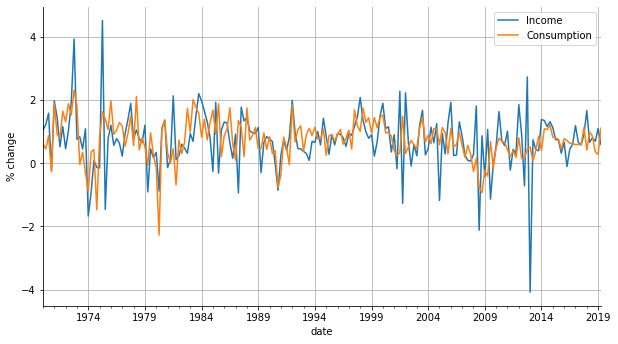

In [73]:
fig, ax = plt.subplots()
df_us['Income Consumption'.split()].plot(ax=ax)
ax.set(ylabel='% change')
ax.grid()

In [75]:
fit = smf.ols('Consumption ~ Income', df_us).fit()

In [76]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     33.84
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           2.40e-08
Time:                        20:39:25   Log-Likelihood:                -175.65
No. Observations:                 198   AIC:                             355.3
Df Residuals:                     196   BIC:                             361.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5445      0.054     10.079      0.000       0.438       0.651
Income         0.2718      0.047      5.817      0.000       0.180       0.364
==============================================================================
Omnibus:                       19.675   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.285
Skew:                          -0.476   Prob(JB):                     2.95e-09
Kurtosis:                       4.964   Cond. No.                         2.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A scatter plot of consumption changes against income changes with estimated regression line 

$\^y_{t} = 0.54 + 0.27x_{t}$

The fitted line has a positive slope, reflecting the positive relationship between income and consumption. 

The slope coefficient shows that a one unit increase in $x$ (a 1 percentage point increase in personal disposable income) results on average in 0.27 units increase in  
$y$ (an average increase of 0.27 percentage points in personal consumption expenditure)

Alternatively the estimated equation shows that a value of 1 for $x$ (the percentage increase in personal disposable income) will result in a forecast value of  

$0.54+0.27*1=0.82$

for $y$ (the percentage increase in personal consumption expenditure).


The interpretation of the intercept requires that a value of $x=0$ makes sense. In this case when  
$x=0$ (i.e., when there is no change in personal disposable income since the last quarter) the predicted value of  
$y$ is $0.54$ (i.e., an average increase in personal consumption expenditure of $0.54%$). Even when  
$x=0$ does not make sense, the intercept is an important part of the model. Without it, the slope coefficient can be distorted unnecessarily. The intercept should always be included unless the requirement is to force the regression line “through the origin”. In what follows we assume that an intercept is always included in the model.



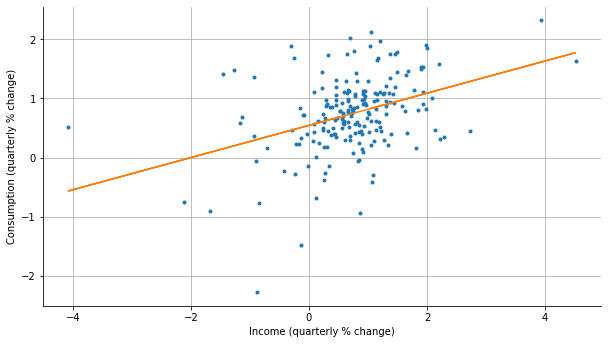

In [78]:
fig, ax = plt.subplots()
d = df_us
ax.plot(d.Income, d.Consumption, '.')
ax.plot(d.Income, fit.predict())
ax.set(ylabel="Consumption (quarterly % change)", xlabel="Income (quarterly % change)")
ax.grid()

When there are two or more predictor variables, the model is called a multiple regression model. The general form of a multiple regression model is

$y_{t} = \beta_{0}+\beta_{1}x_{1, t}+\beta_{2}x_{2,t}+...+\beta_{k}x_{k,t} + \epsilon_{t}$

There are other potential predictors that may be useful for forecasting US consumption expenditure.
These are $quarterly\ percentage\ changes$ in industrial production and $personal\ savings$ and $quarterly\ changes\ in\ the\ unemployment\ rate$(already in %).

Buidling a multiple regression model can potentially generate more accurate forecast as we expect consumption expenditure to not only depend on personal income but on other predictors as well.

In [82]:
def rlabel(ax, label=None, **kw):
    """Add a right-side axis title."""
    if label is None:
        ax, label = plt.gca(), ax
    bbox = kw.pop('bbox', dict(facecolor='.9', alpha=0.2))
    ax.text(1, .5, label,
            rotation=-90, ha='left', va='center', transform=ax.transAxes,
            bbox=bbox, **kw)

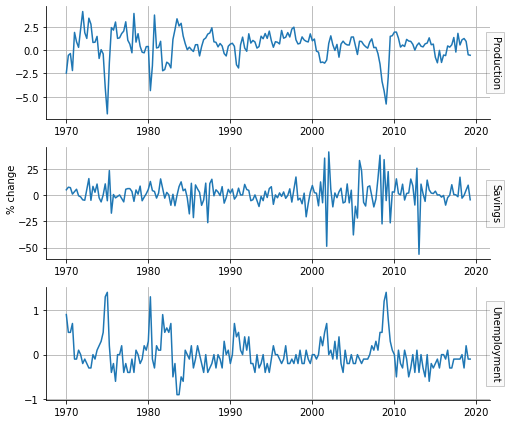

In [83]:
fig, axs = plt.subplots(3, figsize=(7,6))
for (ax, feature) in zip(axs, 'Production Savings Unemployment'.split()):
    ax.plot(df_us[feature])
    rlabel(ax, feature)
    ax.grid()
fig.text(0, .5, '% change', rotation=90)
plt.tight_layout()

SCATTERPLOT Matrix among the key predictors of US Expenditure Consumption.

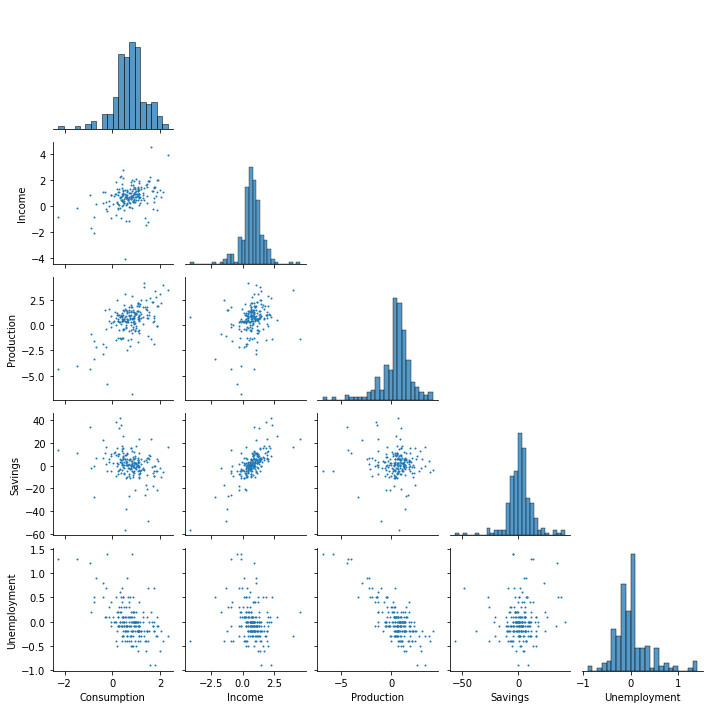

In [86]:
sns.pairplot(df_us, plot_kws=dict(linewidth=0, s=4), corner=True, height=2);

The first column shows the relationships between the forecast variable (consumption) and each of the predictors.\
The scatterplots show positive relationships with income and industrial production, and negative relationships with savings and unemployment.

When we use a linear regression model, we are implicitly making some assumptions about the variables in Equation.\
\
First, we assume that the model is a reasonable approximation to reality; that is, the relationship between the forecast variable and the predictor variables satisfies this linear equation.

Second, we make the following assumptions about the errors  $(\epsilon_{1},...,\epsilon_{T})$:

$\bullet$  they have mean zero; otherwise the forecasts will be systematically biased.\
$\bullet$  they are not autocorrelated; otherwise the forecasts will be inefficient, as there is more information in the data that can be exploited.\
$\bullet$  they are unrelated to the predictor variables; otherwise there would be more information that should be included in the systematic part of the model.\

It is also useful to have the errors being normally distributed with a constant variance  $\sigma^2$
  in order to easily produce prediction intervals.

Another important assumption in the linear regression model is that each predictor  
$x$ is not a random variable. If we were performing a controlled experiment in a laboratory, we could control the values of each  $x$ (so they would not be random) and observe the resulting values of  
$y$. With observational data (including most data in business and economics), it is not possible to control the value of $x$, we simply observe it.